In [2]:
import ast
import glob
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [14]:
NN_files = glob.glob("experiment_nn_yahoo_25-*.out")

NN_NDCGs = []
NN_runtimes = []
for file in NN_files:
    with open(file, "r") as f:
        line = f.readlines()
    ndcg_value = []
    time = []
    for dic in eval(line[0]):
        ndcg_value.append(dic["test result"]["dataset normalized maximum likelihood"])
        time.append(dic["total time"])
    NN_runtimes.append(time)
    NN_NDCGs.append(ndcg_value)

In [15]:
NN_log_files = glob.glob("experiment_nn_log_yahoo_25-*.out")

NN_log_NDCGs = []
NN_log_runtimes = []
for file in NN_log_files:
    with open(file, "r") as f:
        line = f.readlines()
    ndcg_value = []
    time = []
    for dic in eval(line[0]):
        ndcg_value.append(dic["test result"]["dataset normalized maximum likelihood"])
        time.append(dic["total time"])
    NN_log_runtimes.append(time)
    NN_log_NDCGs.append(ndcg_value)

In [16]:
XGBoost_files = glob.glob("experiment_xgboost_yahoo_25-*.out")

XGBoost_NDCGs = []
XGBoost_runtimes = []
for file in XGBoost_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    XGBoost_runtimes.append(time)
    XGBoost_NDCGs.append(eval(lines[0])["test"]["NDCG@25"])

In [17]:
Without_Hessian_files = glob.glob("experiment_without_hessian_yahoo_25-*.out")

Without_Hessian_NDCGs = []
Without_Hessian_runtimes = []
for file in Without_Hessian_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    Without_Hessian_runtimes.append(time)
    Without_Hessian_NDCGs.append(eval(lines[0])["test"]["NDCG@25"])

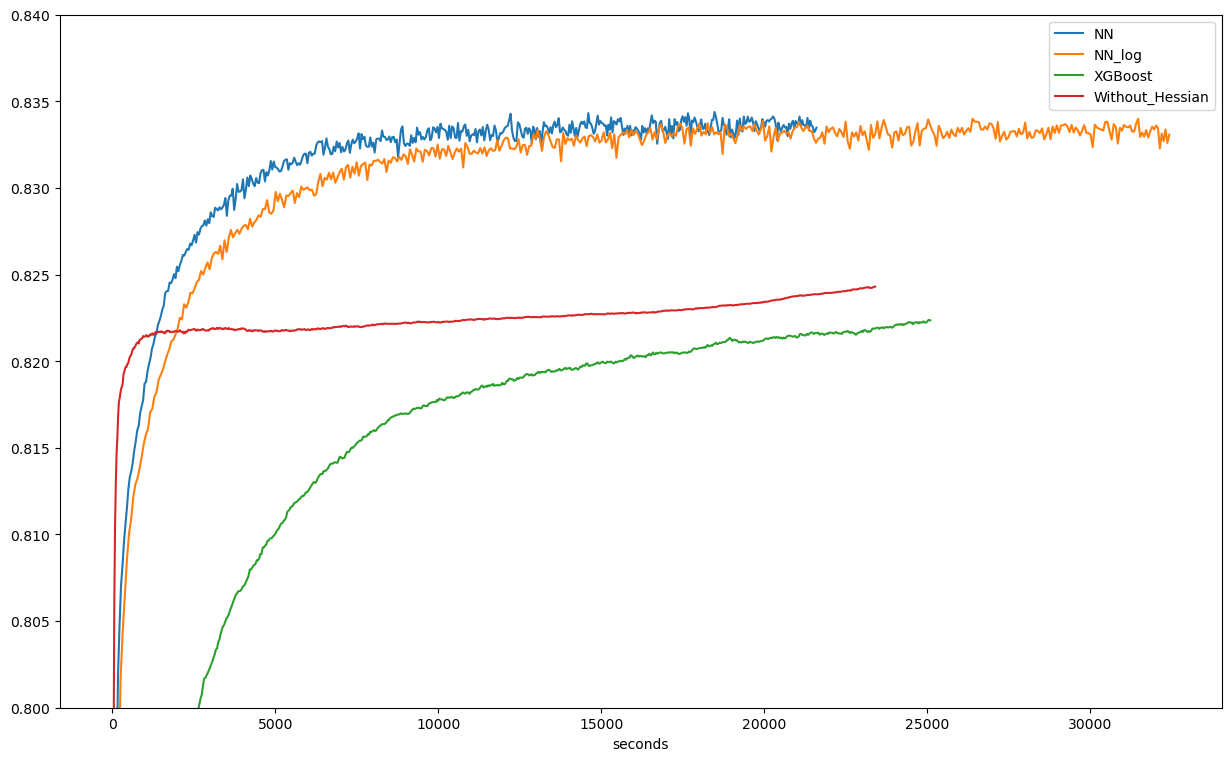

In [19]:
plt.figure(figsize=(15, 9))
plt.plot(
    np.mean(np.array(NN_runtimes), axis=0),
    np.mean(np.array(NN_NDCGs), axis=0),
    label="NN",
)
plt.plot(
    np.mean(np.array(NN_log_runtimes), axis=0),
    np.mean(np.array(NN_log_NDCGs), axis=0),
    label="NN_log",
)
plt.plot(
    np.mean(np.array(XGBoost_runtimes), axis=0),
    np.mean(np.array(XGBoost_NDCGs), axis=0),
    label="XGBoost",
)
plt.plot(
    np.mean(np.array(Without_Hessian_runtimes), axis=0),
    np.mean(np.array(Without_Hessian_NDCGs), axis=0),
    label="Without_Hessian",
)
plt.ylim(0.80, 0.84)
plt.legend()
plt.xlabel("seconds")
plt.show()

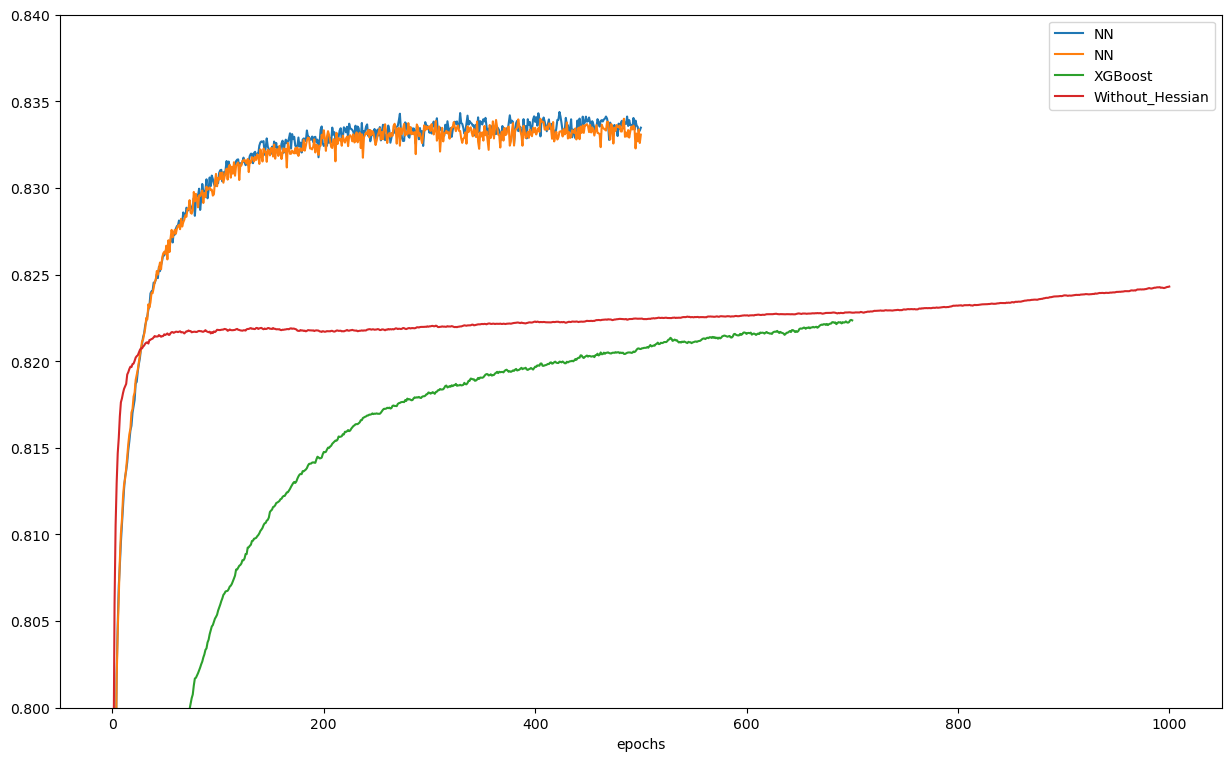

In [20]:
plt.figure(figsize=(15, 9))
plt.plot(
    np.arange(0, 501), np.mean(np.array(NN_NDCGs), axis=0), label="NN",
)
plt.plot(
    np.arange(0, 501), np.mean(np.array(NN_log_NDCGs), axis=0), label="NN",
)
plt.plot(
    np.arange(1, 701), np.mean(np.array(XGBoost_NDCGs), axis=0), label="XGBoost",
)
plt.plot(
    np.arange(1, 1001),
    np.mean(np.array(Without_Hessian_NDCGs), axis=0),
    label="Without_Hessian",
)
plt.ylim(0.80, 0.84)
plt.legend()
plt.xlabel("epochs")
plt.show()